
#Graph methods for imaging, Vision and computing (B31RX) 2025

##Tutorial 6: Bayesian smoothing with a discrete state space

In this tutorial, we will extend the filter from tutorial 5 and implement a Bayesian smoother for online estimation of a (scalar) discrete state. We will first derive the smoothing equations using the Bayes' rule (and variable elimination) and then investigate how the sum-product rules can be used to directly compute the marginal distributions of interest.



## Background

### Bayesian model:

We consider a simple state denoted $x_t ∈ \{0, ..., K-1\}$, which can take $K$ values at
each time instant. This state can vary over time with $t ∈ \{1, ..., T\}$


The variations of $x$ over time is modelled by a
homogeneous order-1 Markov chain such that the  probabilities

$$f(x_{t+1} = i | x_t = j) = π_{i,j}$$

are assumed to be known. Note that:
$Σ_{i=0}^{K-1} π_{i,j} = 1$.

This state is the parameter we try to estimate but it is not directly measured. Instead, we observe sequentially a set of observations $y_1, \ldots, y_T$ distributed to binomial distributions as follows:

$$
y_t | (x_t = i) \sim \text{Binomial}(N, \beta_i),
$$

where $N$ is a known integer and $\beta_0, \ldots, \beta_{K-1}$ are a set of known probabilities. More precisely, if $x_t = i$, the observation $y_t$ follows a binomial distribution whose probability of success depends on the value of the state $x_t$. The probability mass function of Binomial distribution with parameters $(N, \beta)$ is given by

$$
f(y|N, \beta) = \binom{N}{y} \beta^y (1 - \beta)^{N-y}.
$$

For simplicity, the parameter $N$ is shared across all models and does not depend on $x_t$. It should be noted that the data likelihood should be denoted by $f(y_t | (x_t = i, N, \beta_i))$. However, since $N$ and $\beta = \{\beta_0, \ldots, \beta_{K-1}\}$ are assumed to be known and fixed, they are omitted to simplify the notation.

In the previous tutorial, we computed for each time instant, the predictive distribution:

$$
f(x_t = i \mid {\bf{y}}_{t-1}) = \sum_{j=0}^{K-1} \pi_{i,j} \gamma_j, \quad \forall i \in \{0, K-1\}
$$

With

$$
\gamma_i = f(x_{t-1} = i \mid {\bf{y}}_{t-1})
$$

and the posterior distribution:

$$
f(x_t = i \mid {\bf{y}}_t), \forall i.
$$

### Question 1

Compute the expression of the joint p.m.f. $ f(x_T, x_{T-1} \mid {\bf{y}}_{T-1}, y_T) $ using $ f(x_{T-1} \mid {\bf{y}}_{T-2}) $.

$$
\color{blue}{f(x_T, x_{T-1} \mid {\bf{y}}_{T-1}, y_T) \propto f(x_T, x_{T-1}, y_T, y_{T-1} \mid {\bf{y}}_{T-2})}
$$

$$
\color{blue}{f(x_T, x_{T-1} \mid {\bf{y}}_{T-1}, y_T) \propto f(x_{T-1} \mid {\bf{y}}_{T-2}) f(y_{T-1} \mid x_{T-1}) f(x_T \mid x_{T-1}) f(y_T \mid x_T)}
$$

### Question 2

By marginalising $ x_T $ from $ f(x_T, x_{T-1} \mid {\bf{y}}_{T-1}, y_T) $, show that $ f(x_{T-1} \mid {\bf{y}}_T) $ can be expressed as

$$
f(x_{T-1} \mid {\bf{y}}_T) \propto \phi_{T-2}(x_{T-1}) G_{T-1}(x_{T-1}) \Psi_T(x_{T-1}),
$$

where $ \phi_{T-2}(\cdot) $ only depends on data observed at $ t < T-1 $, $ G_{T-1}(\cdot) $ only depends on $ y_{T-1} $ and $ \Psi_T(\cdot) $ only depends on $ y_T $.

Provide the expression of $ \phi_{T-2}(\cdot) $, $ G_{T-1}(\cdot) $ and $ \Psi_T(\cdot) $.

Note the difference between $ f(x_{T-1} \mid {\bf{y}}_{T-1}) $ and $ f(x_{T-1} \mid {\bf{y}}_T) $. The former is the marginal distribution of $ x_{T-1} $ obtained after observing $ y_{T-1} $ but before observing $ y_T $, while $ f(x_{T-1} \mid {\bf{y}}_T) $ is the marginal distribution of $ x_{T-1} $ obtained after observing all the data.

$$
\color{blue}{f(x_{T-1} \mid {\bf{y}}_{T-1}, y_T) \propto \sum_{i=0}^{K-1} f(x_{T-1} \mid {\bf{y}}_{T-2}) f(y_{T-1} \mid x_{T-1}) f(x_T = i \mid x_{T-1}) f(y_T \mid x_T = i)}
$$

$$
\color{blue}{f(x_{T-1} \mid {\bf{y}}_{T-1}, y_T) \propto f(x_{T-1} \mid {\bf{y}}_{T-2}) f(y_{T-1} \mid x_{T-1}) \sum_{i=0}^{K-1} f(x_T = i \mid x_{T-1}) f(y_T \mid x_T = i)}
$$

$$
\color{blue}{G_{T-1}(x_{T-1}) \propto f(y_{T-1} \mid x_{T-1})}
$$

$$
\color{blue}{\phi_{T-2}(x_{T-1}) \propto f(x_{T-1} \mid {\bf{y}}_{T-2})}
$$

$$
\color{BLUE}{\Psi_T(x_{T-1}) \propto \sum_{i=0}^{K-1} f(x_T = i \mid x_{T-1}) f(y_T \mid x_T = i) \propto f(x_{T-1} \mid y_T)},
$$

$$\color{blue}{\text{assuming that we have a uniform prior on $x_T$}}$$

### Question 3

In the context of Tutorial 5, what does the product $ \phi_{T-2}(x_{T-1}) G_{T-1}(x_{T-1}) $ represent?

$$
\color{blue}{f(x_{T-1} \mid {\bf{y}}_{T-1}) \propto \phi_{T-2}(x_{T-1}) G_{T-1}(x_{T-1})}
$$

$\color{blue}{\text{It represents the marginal distribution of $ x_{T-1} $ conditioned on all the data observed up to time $ T - 1 $, which is the distribution computed using the Bayesian filter of Tutorial 5.}}$

### Question 4

Similarly, compute $ f(x_{T-2} \mid {\bf{y}}_T) $, the marginal distribution of $ x_{T-2} $ by starting from

$$
f(x_T, x_{T-1}, x_{T-2} \mid {\bf{y}}_{T-2}, y_{T-1}, y_T)
$$

and show that it can be expressed as

$$
f(x_{T-2} \mid y_T) \propto \phi_{T-3}(x_{T-2}) G_{T-2}(x_{T-2}) \Psi_{T-1}(x_{T-2}).
$$

Specify what the three factors represent in terms of probability mass functions.

$$
\color{blue}{f(x_T, x_{T-1}, x_{T-2} \mid {\bf{y}}_{T-2}, y_{T-1}, y_T) \propto f(x_T, x_{T-1}, x_{T-2}, y_T, y_{T-1}, y_{T-2} \mid {\bf{y}}_{T-3})}
$$

$$
\color{blue}{\propto f(x_{T-2} \mid {\bf{y}}_{T-3}) f(y_{T-2} \mid x_{T-2}) f(x_{T-1} \mid x_{T-2}) f(y_{T-1} \mid x_{T-1}) f(x_T \mid x_{T-1}) f(y_T \mid x_T)}
$$

$\color{blue}{\text{If we first integrate over $x_T$, we obtain}}$

$$
\color{blue}{f(x_{T-1}, x_{T-2} \mid {\bf{y}}_{T-2}, y_{T-1}, y_T) \propto f(x_{T-2} \mid {\bf{y}}_{T-3}) f(y_{T-2} \mid x_{T-2}) f(x_{T-1} \mid x_{T-2}) f(y_{T-1} \mid x_{T-1}) \Psi_T(x_{T-1}).}
$$

$\color{blue}{\text{If we then integrate over $x_{T-1}$, we obtain}}$

$$
\color{blue}{f(x_{T-2} \mid y_{T-2}, y_{T-1}, y_T) \propto f(x_{T-2} \mid {\bf{y}}_{T-3}) f(y_{T-2} \mid x_{T-2}) \Psi_{T-1}(x_{T-2}).}
$$

$\color{blue}{\text{With}}$

$$
\color{blue}{\Psi_{T-1}(x_{T-2}) \propto \sum_{i=0}^{K-1} f(x_{T-1} = i \mid x_{T-2}) f(y_{T-1} \mid x_{T-1} = i) \Psi_T(x_{T-1} = i).}
$$

$\color{blue}{\text{This leads to}}$

$$
\color{blue}{\phi_{T-3}(x_{T-2}) = f(x_{T-2} \mid {\bf{y}}_{T-3})}
$$

$$
\color{blue}{G_{T-2}(x_{T-2}) = f(y_{T-2} \mid x_{T-2})}
$$

$$
\color{blue}{\Psi_{T-1}(x_{T-2}) \propto \sum_{i=0}^{K-1} f(x_{T-1} = i \mid x_{T-2}) f(y_{T-1} \mid x_{T-1} = i) \Psi_T(x_{T-1} = i)}
$$

$$
\color{blue}{\Psi_{T-1}(x_{T-2}) \propto \sum_{i=0}^{K-1} f(x_{T-1} = i \mid x_{T-2}) G_{T-1}(x_{T-1} = i) \Psi_T(x_{T-1} = i)}
$$

### Question 5

Derive the expression of the marginal distribution $ f(x_i \mid y_T) $, $ \forall i \in \{1, \dots, T\} $.

$\color{blue}{\text{Following this strategy recursively from $ t = T - 1 $ to $ t = 1 $, we obtain}}$

$$
\color{blue}{G_t(x_t) = f(y_t \mid x_t), \forall t \in \{1, \dots, T\}.}
$$

$$
\color{blue}{\phi_{t-1}(x_t) = f(x_t \mid {\bf{y}}_{t-1}), \forall t \in \{1, \dots, T\}.}
$$

$$
\color{blue}{\Psi_{t+1}(x_t) \propto \sum_{i=0}^{K-1} f(x_{t+1} = i \mid x_t) f(y_{t+1} \mid x_{t+1} = i) \Psi_{t+2}(x_{t+1} = i), \forall t \in \{1, \dots, T\}.}
$$

So far, we have seen how to compute the marginal distributions of $ f(x_i \mid {\bf{y}}_T) $ which requires computing $ \phi_{t-1}(\cdot) $, $ G_t(\cdot) $, and $ \Psi_{t+1}(\cdot) $, $ \forall t \in \{1, \dots, T - 1\} $.

These quantities can actually be computed iteratively by passing twice through the nodes of the graph. We will now derive the results using the rules of the **sum-product algorithm**.

### Question 6

Draw the factor graph (FG) associated with the Bayesian model

$$
f(x_1, \dots, x_T, y_1, \dots, y_T).
$$

Cloning into 'B31XR'...
remote: Enumerating objects: 173, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (164/164), done.
remote: Total 173 (delta 81), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (173/173), 8.74 MiB | 5.42 MiB/s, done.
Resolving deltas: 100% (81/81), done.
/content/B31XR/Tutorial 6


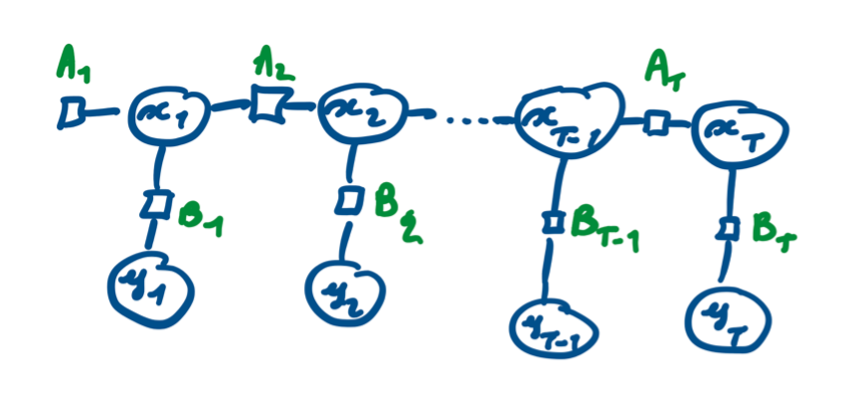

In [3]:
!git clone https://github.com/BISC-Group-HWU/B31XR.git
%cd B31XR/Tutorial\ 6

from IPython.display import Image, display

display(Image(filename='FG.png'))

### Question 7

Is this graph a tree?  

$\color{blue}{\text{Yes}}$

### Question 8

Compute the messages from each leaf variable to their neighbours (factor nodes)  


$$
\color{blue}{\mu_{y_t \to B_t}(y_t) = 1.} \quad \color{blue}{\text{(see lecture }notes)}
$$

### Question 9

Starting from $ x_1 $, compute the messages propagating from $ t = 1 $ to $ t = T $.

$$
\color{blue}{\mu_{B_t \to x_t}(x_t) = f(y_t \mid x_t), \forall t}
$$

$$
\color{blue}{\mu_{A_1 \to x_1}(x_1) = f(x_1)}
$$

$$
\color{blue}{\mu_{x_1 \to A_2}(x_1) = \mu_{A_1 \to x_1}(x_1) \mu_{B_1 \to x_1}(x_1) = f(x_1) f(y_1 \mid x_1)}
$$

$$
\color{blue}{\mu_{A_2 \to x_2}(x_2) = \sum_{x_1=0}^{K-1} \mu_{x_1 \to A_2}(x_1) f(x_2 \mid x_1)}
$$

$\color{blue}{\text{And as we iterate:}}$

$$
\color{blue}{\mu_{x_t \to A_{t+1}}(x_t) = \mu_{A_t \to x_t}(x_t) \mu_{B_t \to x_t}(x_t)}
$$

$$
\color{blue}{\mu_{A_{t+1} \to x_{t+1}}(x_{t+1}) = \sum_{x_t=0}^{K-1} \mu_{x_t \to A_{t+1}}(x_t) f(x_{t+1} \mid x_t)}
$$

### Question 10

Starting from $ x_T $, compute the messages propagating from $ t = T $ to $ t = 1 $ and verify the marginal distributions correspond to those found in **Question 5**.

$$
\color{blue}{\mu_{x_T \to A_T}(x_T) = \mu_{B_T \to x_T}(x_T)}
$$

$$
\color{blue}{\mu_{A_T \to x_{T-1}}(x_{T-1}) = \sum_{x_T=0}^{K-1} \mu_{x_T \to A_T}(x_T) f(x_T \mid x_{T-1})}
$$

$\color{blue}{\text{And as we iterate:}}$

$$
\color{blue}{\mu_{x_t \to A_t}(x_t) = \mu_{A_{t+1} \to x_t}(x_t) \mu_{B_t \to x_t}(x_t)}
$$

$\color{blue}{\text{Finally, the marginal distributions can be obtained as}}$

$$
\color{blue}{f(x_t \mid {\bf{y}}_T) \propto \mu_{A_t \to x_t}(x_t) \mu_{B_t \to x_t}(x_t) \mu_{A_{t+1} \to x_t}(x_t)}
$$

$\color{blue}{\text{And we can verify that}}$

$$
\color{blue}{\mu_{A_t \to x_t}(x_t) \propto f(x_t \mid {\bf{y}}_{t-1})}
$$

$$
\color{blue}{\mu_{B_t \to x_t}(x_t) \propto f(y_t \mid x_t)}
$$

$$
\color{blue}{\mu_{A_{t+1} \to x_t}(x_t) \propto f(x_t \mid y_{t+1}, \dots, y_T)}
$$

### Question 11

Implement the sum-product algorithm for this Bayesian model and, using the data of **Tutorial 5**, compare the estimation results of the **Bayesian filter (Tutorial 5)** and **Bayesian smoother (this Tutorial 6)**.  

What do you remark?

dict_keys(['__header__', '__version__', '__globals__', 'N', 'T', 'bet', 'x', 'y'])


<ipython-input-21-624753bd4a6e>:47: RuntimeWarning: divide by zero encountered in log
  log_posterior = log_likelihood[t, :] + np.log(Forward_prediction[t, :])
<ipython-input-21-624753bd4a6e>:71: RuntimeWarning: divide by zero encountered in log
  log_posterior = log_likelihood[t, :] + np.log(Backward_prediction[t, :]) + np.log(Forward_prediction[t, :])


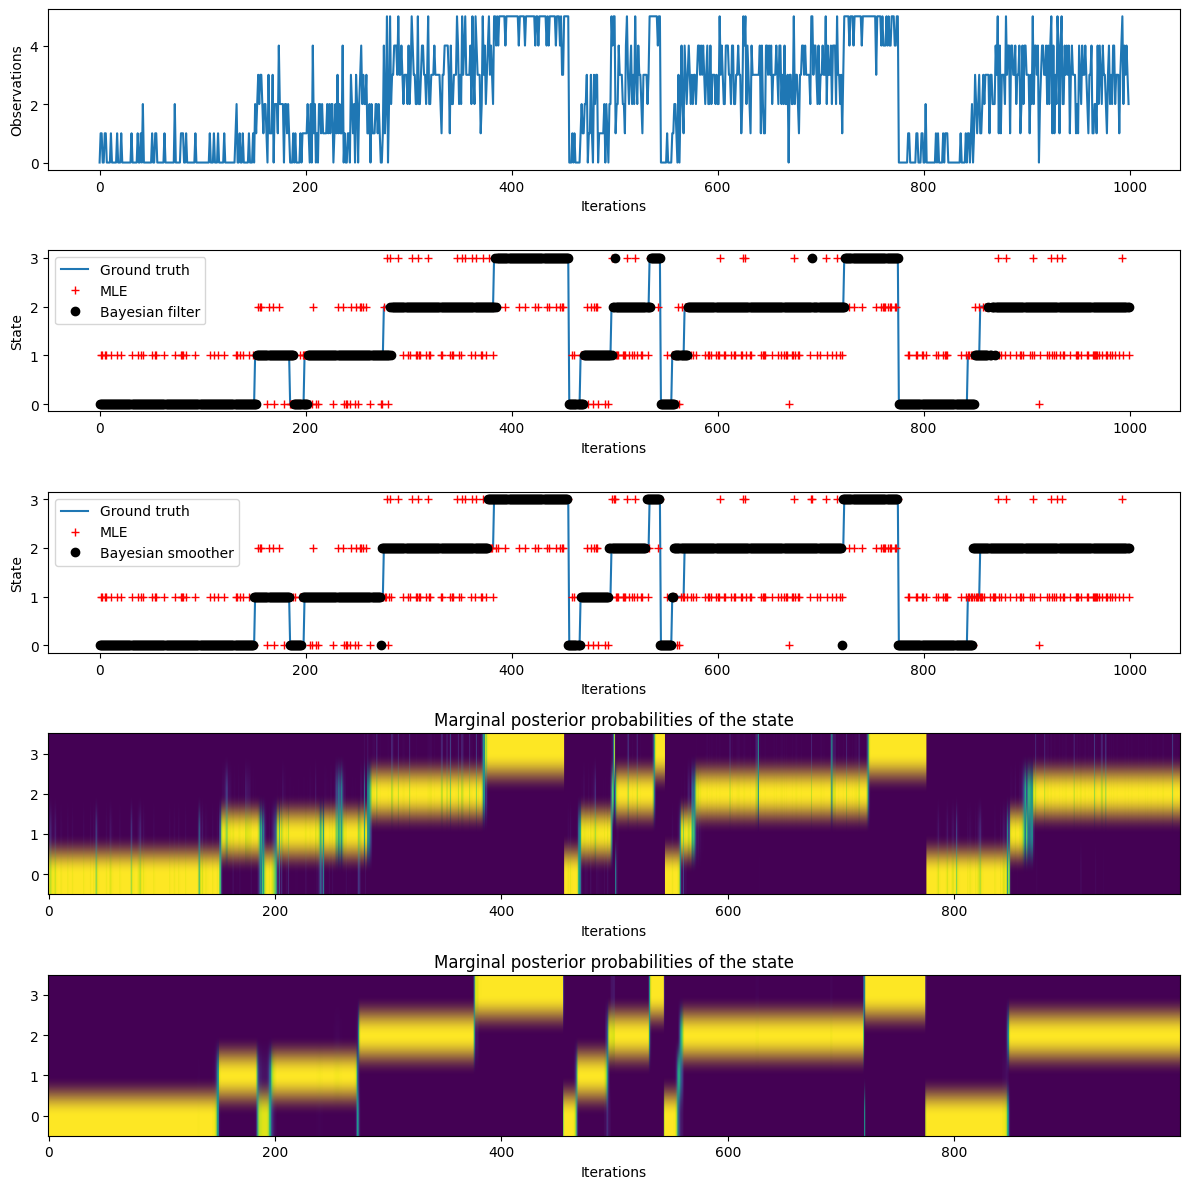

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Define the parameters and load the data
data = loadmat('data_tutorial5_K=4_N=5.mat')

# The data variable is a dictionary. We'll need to know the key names to access `T` and `N`
# Let's print out the keys
print(data.keys())

T = data['T'][0,0]
N = data['N'][0,0]
bet = data['bet'][0]
x = data['x'][0]
y = data['y'][0]

prior = np.array([0.9, 0.1, 0, 0])  # We know we start in state 0
Pt = np.array([[0.99, 0.01, 0, 0],
               [0.005, 0.99, 0.005, 0],
               [0, 0, 0.99, 0.01],
               [0.05, 0, 0, 0.95]]).T

# Assuming T and N are defined in the loaded data
x_MLE = np.zeros(T)
x_MAP = np.zeros(T)
x_MMAP = np.zeros(T)
log_likelihood = np.zeros((T, len(bet)))

Forward_prediction = np.zeros((T, len(bet)))
Backward_prediction = np.zeros((T, len(bet)))

Forward_posterior = np.zeros((len(bet), T))
Backward_posterior = np.zeros((len(bet), T))
marginal = np.zeros((len(bet), T))

# Forward pass
for t in range(T):

    Forward_prediction[t, :] = prior

    log_likelihood[t, :] = y[t] * np.log(bet) + (N - y[t]) * np.log(1 - bet)
    # Compute MLE
    x_MLE[t] = np.argmax(log_likelihood[t, :])

    # Data update (KF)
    log_posterior = log_likelihood[t, :] + np.log(Forward_prediction[t, :])
    b = log_posterior - np.max(log_posterior)
    b = np.exp(b)
    Forward_posterior[:, t] = b / np.sum(b)

    # Prediction step (for time t+1)
    prior = Pt @ Forward_posterior[:, t]
    x_MAP[t] = np.argmax(b)

# Backward pass
prior = np.ones(len(bet))
for t in range(T-1,-1,-1):

    Backward_prediction[t, :] = prior

    # Data update (KF)
    log_posterior = log_likelihood[t, :] + np.log(Backward_prediction[t, :])
    b = log_posterior - np.max(log_posterior)
    b = np.exp(b)
    Backward_posterior[:, t] = b / np.sum(b)
    # Prediction step (for time t+1)
    prior = Pt @ Backward_posterior[:, t]

    # Marginal distribution
    log_posterior = log_likelihood[t, :] + np.log(Backward_prediction[t, :]) + np.log(Forward_prediction[t, :])
    b = log_posterior - np.max(log_posterior)
    b = np.exp(b)
    marginal[:, t] = b / np.sum(b)
    x_MMAP[t] = np.argmax(b)


# Plotting
plt.figure(figsize=(12,12))

plt.subplot(511)
plt.plot(y)
plt.xlabel('Iterations')
plt.ylabel('Observations')

plt.subplot(512)
plt.plot(x, label='Ground truth')
plt.plot(x_MLE, 'r+', label='MLE')
plt.plot(x_MAP, 'ko', label='Bayesian filter')
plt.xlabel('Iterations')
plt.ylabel('State')
plt.legend()

plt.subplot(513)
plt.plot(x, label='Ground truth')
plt.plot(x_MLE, 'r+', label='MLE')
plt.plot(x_MMAP, 'ko', label='Bayesian smoother')
plt.xlabel('Iterations')
plt.ylabel('State')
plt.legend()

plt.subplot(514)
plt.imshow(Forward_posterior, aspect='auto', origin='lower')
plt.xlabel('Iterations')
plt.title('Marginal posterior probabilities of the state')

plt.subplot(515)
plt.imshow(marginal, aspect='auto', origin='lower')
plt.xlabel('Iterations')
plt.title('Marginal posterior probabilities of the state')

plt.tight_layout()
plt.show()